# [Real or Fake] : Fake Job Description Prediction

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.
Dataset can be found here: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

In [2]:
import pandas as pd

In [5]:
real_fake=pd.read_csv('fake_job_postings.csv')

In [6]:
real_fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
real_fake.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


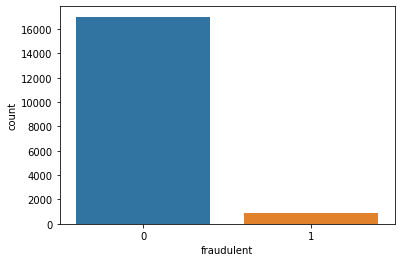

In [14]:
sns.countplot(real_fake['fraudulent'])

We can see very Inbalanced classes

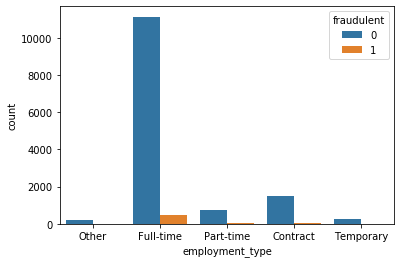

In [17]:
sns.countplot(real_fake['employment_type'], hue=real_fake['fraudulent'])

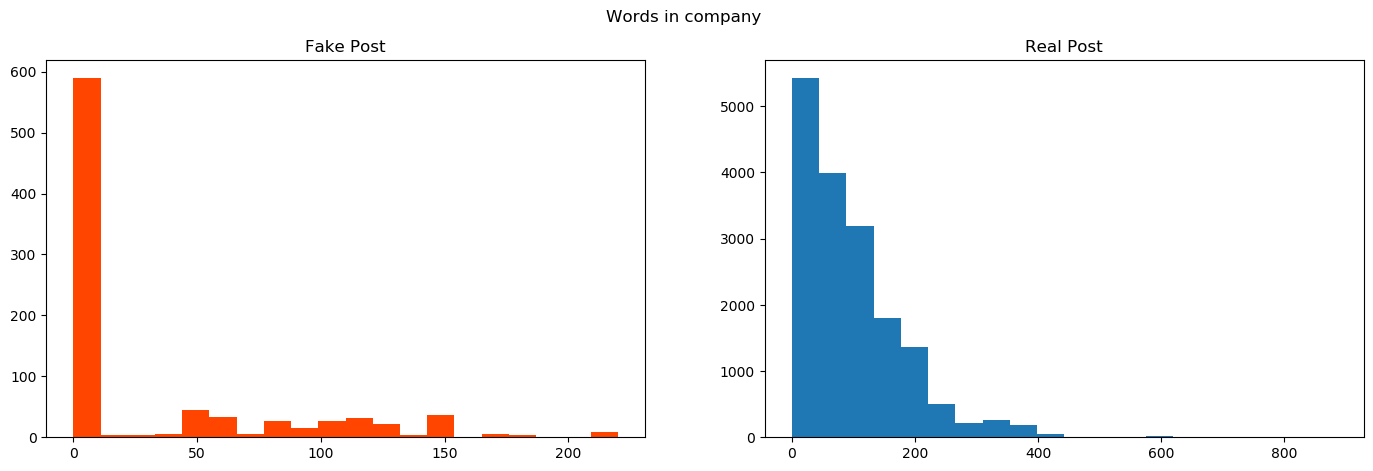

In [55]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=real_fake[real_fake["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=real_fake[real_fake["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company')
plt.show()

The company profile is shorter in fake posts

<Figure size 576x576 with 0 Axes>

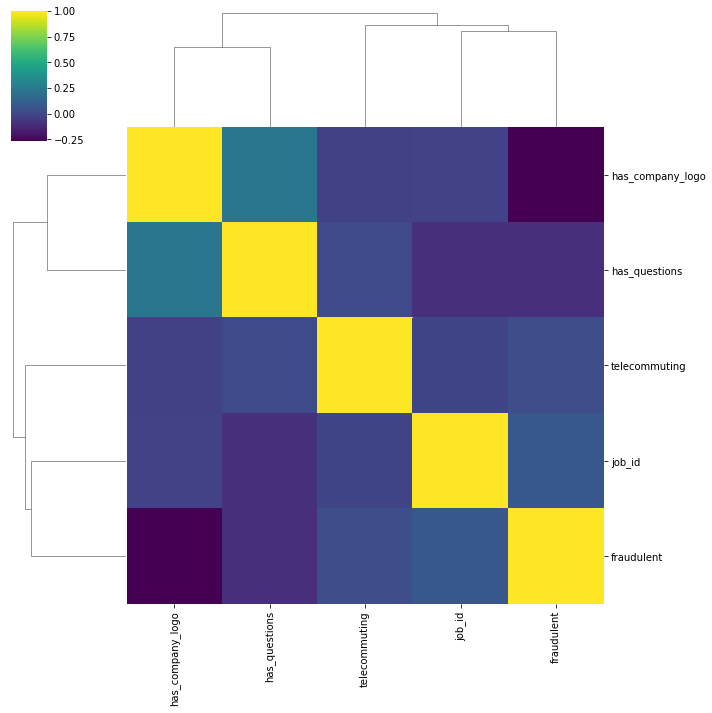

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.clustermap(real_fake.corr(), cmap='viridis')

There is high correlation of the job posting having a company's logo and it having questions.

**Text preprocessing**

In [23]:
#Fill the missing values with a space so concatenation is possible.
real_fake.fillna(" ",inplace = True)
#concatenating all the relevant text fields
real_fake['text'] = real_fake['title'] + ' ' + real_fake['department'] + ' '+ real_fake['location'] + ' ' + real_fake['company_profile'] + ' ' + real_fake['description'] + ' ' + real_fake['requirements'] + ' ' + real_fake['benefits'] + ' ' + real_fake['employment_type'] + ' ' + real_fake['required_education'] + ' ' + real_fake['industry'] + ' ' + real_fake['function'] 

In [24]:
real_fake['text'].head()

0    Marketing Intern Marketing US, NY, New York We...
1    Customer Service - Cloud Video Production Succ...
2    Commissioning Machinery Assistant (CMA)   US, ...
3    Account Executive - Washington DC Sales US, DC...
4    Bill Review Manager   US, FL, Fort Worth SpotS...
Name: text, dtype: object

In [40]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    #Remove the stop words and lematize the remaining words
lemmatizer = WordNetLemmatizer()
def lem_word(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = nltk.pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [79]:
real_fake['text']=real_fake['text'].apply(lem_word)

Now it's time to deal with the imbalance in classes by down-sampling the majority class

In [110]:
real_fake["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [112]:
from sklearn.utils import resample

df_majority = real_fake[real_fake["fraudulent"]==0]
df_minority = real_fake[real_fake["fraudulent"]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=866)     # to match minority class

 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled["fraudulent"].value_counts()

1    866
0    866
Name: fraudulent, dtype: int64

In [169]:
#Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_downsampled['text'], df_downsampled["fraudulent"], test_size=0.2)

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [195]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [219]:
predictions = pipeline.predict(X_test)

In [212]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(predictions,y_test))
confusion_matrix = confusion_matrix(predictions, y_test)

score=accuracy_score(predictions, y_test)
print("Accuracy:", score)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       174
           1       0.90      0.91      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347

Accuracy: 0.9077809798270894


In [199]:
confusion_matrix 

array([[157,  17],
       [ 15, 158]], dtype=int64)

In [221]:
from sklearn.metrics import roc_auc_score
#Area Under ROC Curve (AUROC)
# Predict class probabilities
probabilities = pipeline.predict_proba(X_test)
# Keep only the fraud class
prob_fraud = [p[1] for p in probabilities]

print( roc_auc_score(y_test, prob_fraud) )

0.9666777408637874


In [206]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [207]:
predictions2 = pipeline.predict(X_test)

In [208]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(predictions,y_test))
confusion_matrix2 = confusion_matrix(predictions2, y_test)

score=accuracy_score(predictions, y_test)
print("Accuracy:", score)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       174
           1       0.90      0.91      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347

Accuracy: 0.9077809798270894


# Our model got an accuracy of 91% and a AUROC of 0 with a Naive Bayes model.